# STRESS DETECTION

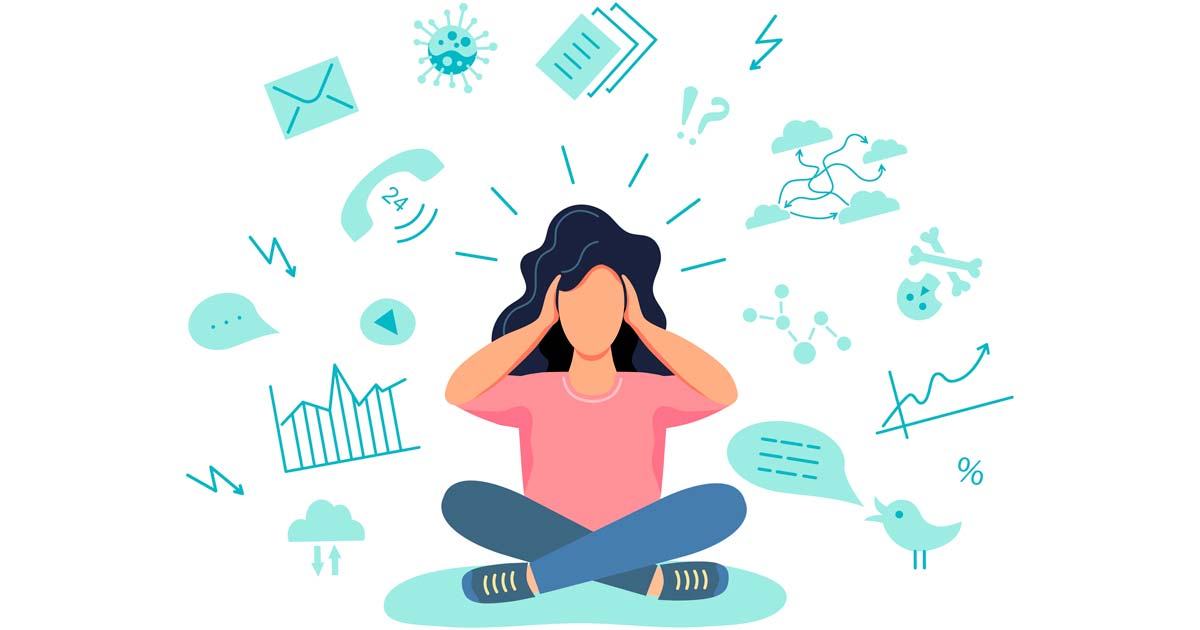

## Aim
The goal of this project is to develop a natural language processing (NLP) model that can predict whether a person is experiencing stress based on their textual input. By analyzing user-provided sentences, the model will classify them into two categories: **stress (1)** and **no stress (0)**. This model could help in understanding how individuals express stress in written form and assist in identifying potential signs of stress in various contexts such as social media, forums, or personal communication.

## Data Explanation
The dataset used in this project consists of textual data from various subreddits. Each row includes the following columns:

1. **text**: A sentence or paragraph representing the user's feelings or thoughts. This is the main input used to predict stress levels.
2. **label**: The target variable, where `0` represents "no stress" and `1` represents "stress". This indicates whether the text is classified as showing signs of stress or not.

The dataset was gathered from various subreddit discussions on topics such as PTSD, relationships, and other personal experiences. The goal is to leverage NLP techniques to analyze how users express emotional or psychological states and classify these expressions as indicating stress or not.

For this project, we will focus on preprocessing the text data (e.g., cleaning, tokenization) and using it to train a machine learning model that can classify new, unseen text into the two categories. 

## Requirements

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import nltk
nltk.download("stopwords")
import re
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MONSTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data

In [153]:
df=pd.read_csv("stress.csv")

## EDA (Exploratory Data Analysis)

In [155]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,lex_liwc_Tone,lex_liwc_WPS,lex_liwc_Sixltr,lex_liwc_Dic,lex_liwc_function,lex_liwc_pronoun,lex_liwc_ppron,lex_liwc_i,lex_liwc_we,lex_liwc_you,lex_liwc_shehe,lex_liwc_they,lex_liwc_ipron,lex_liwc_article,lex_liwc_prep,lex_liwc_auxverb,lex_liwc_adverb,lex_liwc_conj,lex_liwc_negate,lex_liwc_verb,lex_liwc_adj,lex_liwc_compare,lex_liwc_interrog,lex_liwc_number,lex_liwc_quant,lex_liwc_affect,lex_liwc_posemo,lex_liwc_negemo,lex_liwc_anx,lex_liwc_anger,lex_liwc_sad,lex_liwc_social,lex_liwc_family,lex_liwc_friend,lex_liwc_female,lex_liwc_male,...,lex_liwc_drives,lex_liwc_affiliation,lex_liwc_achieve,lex_liwc_power,lex_liwc_reward,lex_liwc_risk,lex_liwc_focuspast,lex_liwc_focuspresent,lex_liwc_focusfuture,lex_liwc_relativ,lex_liwc_motion,lex_liwc_space,lex_liwc_time,lex_liwc_work,lex_liwc_leisure,lex_liwc_home,lex_liwc_money,lex_liwc_relig,lex_liwc_death,lex_liwc_informal,lex_liwc_swear,lex_liwc_netspeak,lex_liwc_assent,lex_liwc_nonflu,lex_liwc_filler,lex_liwc_AllPunc,lex_liwc_Period,lex_liwc_Comma,lex_liwc_Colon,lex_liwc_SemiC,lex_liwc_QMark,lex_liwc_Exclam,lex_liwc_Dash,lex_liwc_Quote,lex_liwc_Apostro,lex_liwc_Parenth,lex_liwc_OtherP,lex_dal_max_pleasantness,lex_dal_max_activation,lex_dal_max_imagery,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,116,72.64,15.04,89.26,1.00,29.00,12.93,87.07,56.03,16.38,12.07,9.48,0.00,0.86,1.72,0.0,4.31,3.45,19.83,7.76,5.17,4.31,1.72,16.38,6.03,3.45,0.86,1.72,1.72,8.62,1.72,6.90,0.86,2.59,3.45,3.45,0.00,0.00,0.00,1.72,...,8.62,0.00,1.72,4.31,0.86,2.59,4.31,11.21,0.86,17.24,0.86,10.34,6.03,0.86,0.00,0.00,0.00,2.59,0.0,0.86,0.86,0.00,0.00,0.0,0.0,21.55,9.48,3.45,0.86,0.86,0.0,0.0,0.0,5.17,1.72,0.00,0.00,2.8571,2.6250,3.0,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,109,79.08,76.85,56.75,98.18,27.25,21.10,87.16,48.62,11.93,7.34,1.83,2.75,2.75,0.00,0.0,4.59,8.26,13.76,6.42,3.67,8.26,0.92,15.60,2.75,0.92,0.92,2.75,0.92,5.50,5.50,0.00,0.00,0.00,0.00,11.01,0.00,0.00,0.00,0.00,...,15.60,5.50,3.67,7.34,2.75,0.00,0.92,13.76,0.92,15.60,2.75,10.09,1.83,11.01,0.00,0.00,0.92,0.00,0.0,1.83,0.00,0.92,0.00,0.0,0.0,14.68,4.59,2.75,0.00,0.00,0.0,0.0,0.0,0.00,2.75,0.92,3.67,3.0000,2.8889,3.0,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,167,33.80,76.38,86.24,25.77,33.40,17.37,91.02,61.68,25.15,16.17,8.98,1.80,1.80,2.99,0.6,8.98,5.39,12.57,10.18,1.80,5.99,1.20,20.96,1.20,0.60,0.60,1.20,1.80,2.40,1.20,1.20,0.00,0.00,0.00,15.57,0.60,3.59,1.80,2.40,...,8.98,5.39,0.60,1.20,2.40,0.00,3.59,14.37,1.80,16.17,4.79,5.99,5.39,0.00,1.20,0.60,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,10.78,2.40,3.59,0.00,0.00,0.6,0.0,0.0,2.40,1.80,0.00,0.00,2.7143,3.0000,3.0,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,273,2.98,15.25,95.42,79.26,54.60,8.06,98.90,65.57,30.40,23.44,16.12,0.37,0.37,6.59,0.0,6.96,3.30,9.16,8.79,6.59,9.89,3.66,20.88,3.66,1.83,1.10,0.00,1.10,8.79,5.86,2.93,0.00,0.37,0.73,13.55,0.37,1.10,0.37,8.06,...,6.59,4.03,0.00,0.73,1.10,0.73,7.69,13.19,1.10,10.99,1.83,3.30,6.23,0.73,0.37,0.37,0.00,0.00,0.0,2.56,0.00,0.73,0.73,0.0,0.0,12.09,2.56,7.33,0.00,0.00,0.0,0.0,0.0,1.47,0.00,0.73,0.00,3.0000,2.6364,3.0,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is 

In [156]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
label                       0
confidence                  0
social_timestamp            0
social_karma                0
syntax_ari                  0
lex_liwc_WC                 0
lex_liwc_Analytic           0
lex_liwc_Clout              0
lex_liwc_Authentic          0
lex_liwc_Tone               0
lex_liwc_WPS                0
lex_liwc_Sixltr             0
lex_liwc_Dic                0
lex_liwc_function           0
lex_liwc_pronoun            0
lex_liwc_ppron              0
lex_liwc_i                  0
lex_liwc_we                 0
lex_liwc_you                0
lex_liwc_shehe              0
lex_liwc_they               0
lex_liwc_ipron              0
lex_liwc_article            0
lex_liwc_prep               0
lex_liwc_auxverb            0
lex_liwc_adverb             0
lex_liwc_conj               0
lex_liwc_negate             0
lex_liwc_v

In [157]:
df.shape

(2838, 116)

In [158]:
df["label"].value_counts()

label
1    1488
0    1350
Name: count, dtype: int64

## Preprocess Text

In [160]:
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words("english"))
def clean_text(text_column):
    # Convert to lowercase
    df[text_column] = df[text_column].str.lower()
    
    # Remove unwanted characters
    df[text_column] = df[text_column].str.replace('[^\w\s]', '', regex=True)
    df[text_column] = df[text_column].str.replace('\w*\d\w*', '', regex=True)
    df[text_column] = df[text_column].str.replace('\n', '', regex=True)
    df[text_column] = df[text_column].str.replace('\r', '', regex=True)
    df[text_column] = df[text_column].str.replace('https?://\S+|www\.\S+', '', regex=True)
    df[text_column] = df[text_column].str.replace('<.*?>+', '', regex=True)
    df[text_column] = df[text_column].str.replace('\[.*?\]', '', regex=True)
    
    # Remove stopwords and apply stemming
    df[text_column] = df[text_column].apply(lambda x: ' '.join(
        stemmer.stem(word) 
        for word in x.split() 
        if word not in stopword
    ))
    return df[text_column]

In [161]:
df.iloc[0]["text"]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [162]:
df["text"]=clean_text("text")

In [163]:
df.iloc[0]["text"]

'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age bs someth could even laugh road end read sens doom indic various health ailment one prone top doom gloomi fn worri heart happen physic hour'

## Word Cloud

In [165]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
def wc(data,color):
    plt.figure(figsize=(10,10))
   # mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=color,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

### Word Cloud for No Stress Texts

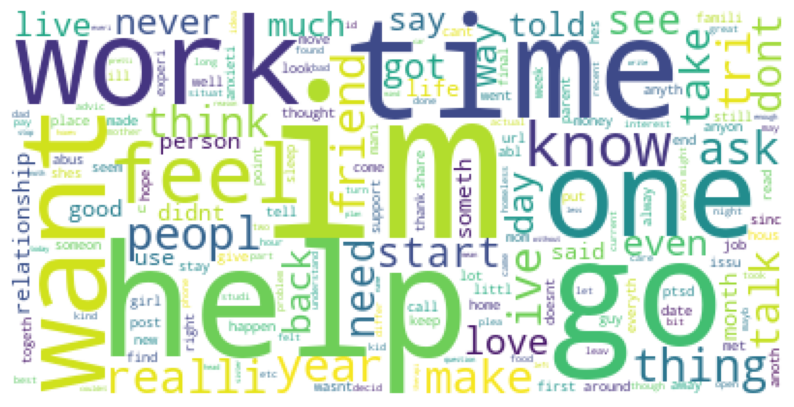

In [167]:
wc(df[df["label"]==0]["text"],"white")

### Word Cloud for Stress Texts

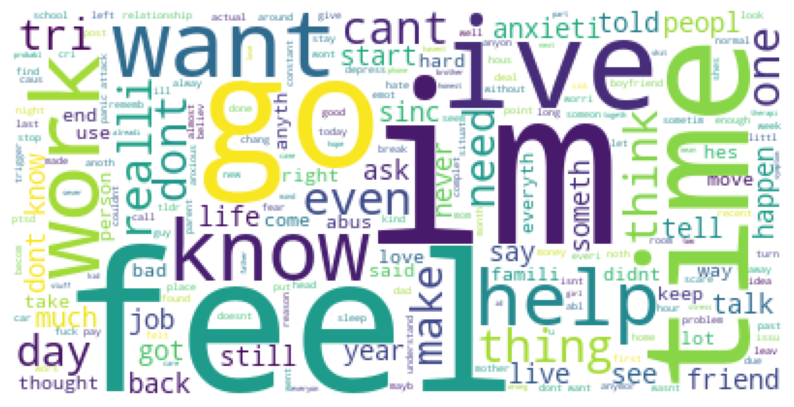

In [169]:
wc(df[df["label"]==1]["text"],"white")

## The Most Used Words for Stress Texts

In [171]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(texts, ngram_range=(2, 3), top_n=10):
    vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    dtm = vect.fit_transform(texts)
    ngram_counts = dtm.sum(axis=0)
    ngrams_freq = [(word, ngram_counts[0, idx]) for word, idx in vect.vocabulary_.items()]
    return sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]

In [186]:
stress_text = df[df['label'] == 1]['text']
stress_ngrams = get_top_ngrams(stress_text, ngram_range=(2, 2), top_n=20)
stress_ngrams

[('feel like', 284),
 ('dont know', 228),
 ('dont want', 83),
 ('panic attack', 73),
 ('like im', 59),
 ('anyon els', 43),
 ('year old', 41),
 ('im tri', 40),
 ('im scare', 39),
 ('know im', 38),
 ('im sure', 38),
 ('month ago', 36),
 ('make feel', 35),
 ('ive tri', 32),
 ('need help', 30),
 ('felt like', 30),
 ('didnt know', 30),
 ('dont feel', 29),
 ('im afraid', 29),
 ('year ago', 29)]

## The Most Used Words for No Stress Texts

In [188]:
no_stress_text = df[df['label'] == 0]['text']
no_stress_ngrams = get_top_ngrams(no_stress_text, ngram_range=(2, 2), top_n=20)
no_stress_ngrams

[('feel like', 71),
 ('mental health', 48),
 ('year old', 47),
 ('dont know', 47),
 ('year ago', 45),
 ('dont want', 44),
 ('let know', 34),
 ('month ago', 29),
 ('best friend', 25),
 ('anyon els', 23),
 ('like im', 19),
 ('feel free', 19),
 ('realli want', 18),
 ('dont think', 18),
 ('im sure', 18),
 ('im look', 18),
 ('didnt want', 17),
 ('high school', 17),
 ('know im', 16),
 ('realli like', 16)]

## Divide the DF

In [99]:
df["label"]=df["label"].map({0:"No Stress",1:"Stress"})
new_df=df[["text","label"]]

In [101]:
new_df.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curre...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


## Modelling

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier  
from sklearn.naive_bayes import MultinomialNB    


def classification_test(x,y,vect,confusion_mtr=False):
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    a=AdaBoostClassifier()
    m=MultinomialNB()
    algos=[b,l,d,rf,h,a,b]

    algo_names=['Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','Ada Boost Classifier','Multinomial NB']

    accuracy=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    result=pd.DataFrame(columns=['Accuracy Score'],index=algo_names)

    for i, algo in enumerate(algos):
        x_train_dtm = vect.fit_transform(x_train)
        x_test_dtm = vect.transform(x_test)

        if hasattr(algo, 'fit'):
            x_train_dtm = x_train_dtm  
            x_test_dtm = x_test_dtm   

        p = algo.fit(x_train_dtm, y_train).predict(x_test_dtm)
        accuracy.append(accuracy_score(y_test, p))
        if confusion_mtr:
            cm = confusion_matrix(y_test, p)
            plt.figure(figsize=(5, 5))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=algo.classes_, yticklabels=algo.classes_,cbar=None)
            plt.title(f"Confusion Matrix - {algo_names[i]}")
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

    result['Accuracy Score']=accuracy

    r_table=result.sort_values('Accuracy Score',ascending=False)
    
        
        
    return r_table[['Accuracy Score']]
    

In [113]:
x=new_df["text"]
y=new_df["label"]

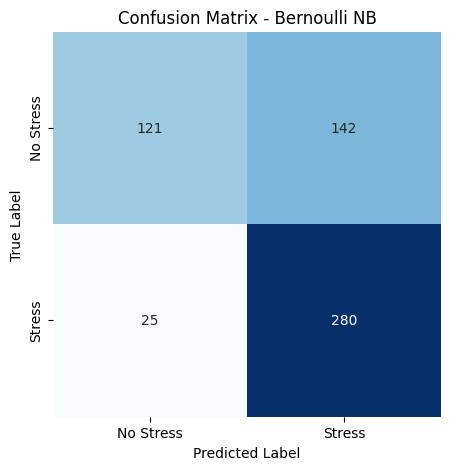

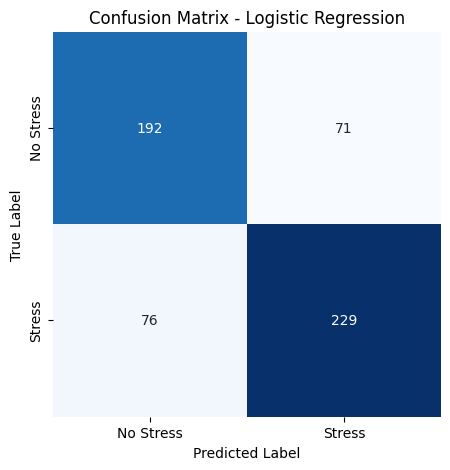

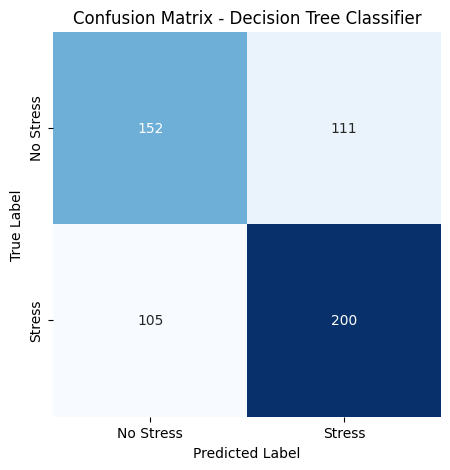

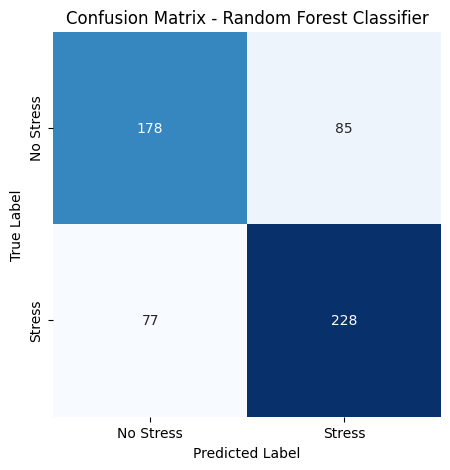

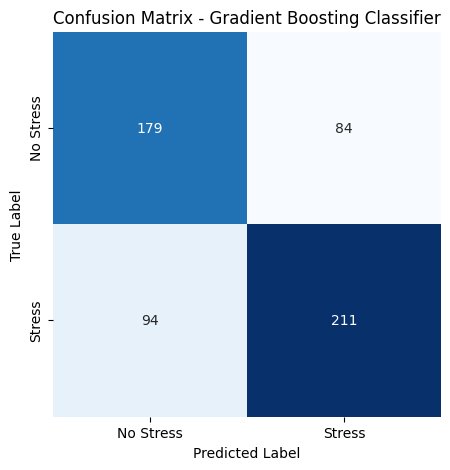

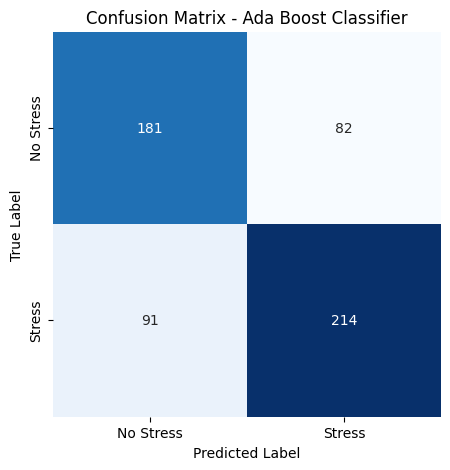

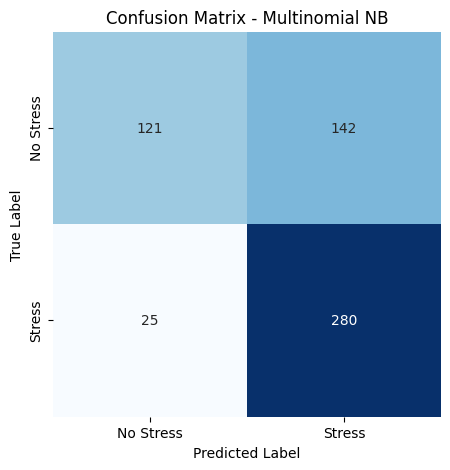

,Accuracy Score
Logistic Regression,0.741197
Random Forest Classifier,0.714789
Bernoulli NB,0.705986
Multinomial NB,0.705986
Ada Boost Classifier,0.695423
Gradient Boosting Classifier,0.686620
Decision Tree Classifier,0.619718


In [119]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,2))
classification_test(x,y,vect,confusion_mtr=True)

In [120]:
vect = CountVectorizer(ngram_range=(1,2))
l=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
model=l.fit(x_train_dtm, y_train)
predictions=model.predict(x_test_dtm)

In [121]:
accuracy_score(y_test, predictions)

0.7411971830985915

In [230]:
import joblib  

joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vect, 'vectorizer.pkl')

['vectorizer.pkl']

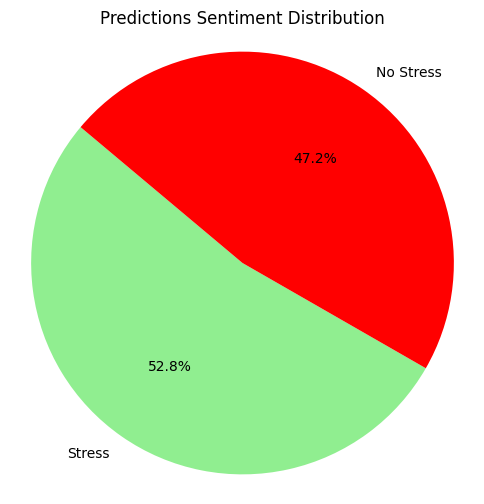

In [208]:
predictions_series = pd.Series(predictions)

predictions_counts = predictions_series.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    predictions_counts, 
    labels=predictions_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['lightgreen','red','lightblue']  
)
plt.title('Predictions Sentiment Distribution')
plt.axis('equal')  
plt.show()

## Testing the Model

In [235]:
text=['People need to take care of their mental health']
text=clean_text_list(text)
text=vect.transform(text)
model.predict(text)

array(['No Stress'], dtype=object)

In [243]:
text=['Sometime I feel like I need some help']
text=vect.transform(text)
model.predict(text)

array(['Stress'], dtype=object)

## Results

After evaluating various machine learning algorithms, the **Logistic Regression** model outperformed the others with the highest accuracy score of **74.12%**. Below are the accuracy scores for the different models tested


The **confusion matrix** for the **Logistic Regression** classifier, which had the highest accuracy, is displayed below. The confusion matrix highlights the performance of the model in terms of true positives, true negatives, false positives, and false negatives:

From the confusion matrix, we can see:
- **True positives (229)**: Predicted as stressed and actually stressed.
- **True negatives (192)**: Predicted as not stressed and actually not stressed.
- **False positives (71)**: Predicted as stressed but actually not stressed.
- **False negatives (76)**: Predicted as not stressed but actually stressed.

These results demonstrate that **Logistic Regression** is the most accurate model for stress prediction, with a high number of true positives and true negatives. However, there is a moderate amount of false positives and false negatives, indicating that the model occasionally misclassifies stressed and non-stressed individuals.

The accuracy score and confusion matrix provide an in-depth view of the performance of the Logistic Regression model, highlighting its strengths and areas for improvement in stress detection.
